### AUTOSCOUT24 PROJECT SOLUTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv("scout_cleaned.csv")

In [3]:
df.shape

(15915, 160)

In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'km', 'prev_owner', 'hp_kw', 'displacement_cc',
       'gears', 'num_door', 'num_seat', 'cylinders',
       ...
       'body_color_Violet', 'body_color_White', 'body_color_Yellow',
       'paint_type_Basic', 'paint_type_Metallic', 'upholstery_Cloth',
       'upholstery_Part/Full Leather', 'drive_chain_4WD', 'drive_chain_front',
       'drive_chain_rear'],
      dtype='object', length=160)

In [5]:
df.head()

Unnamed: 0  price     km  prev_owner  hp_kw  displacement_cc  gears  \
0           0  15770  56013         2.0   66.0           1422.0    6.0   
1           1  14500  80000         1.0  141.0           1798.0    7.0   
2           2  14640  83450         1.0   85.0           1598.0    6.0   
3           3  14500  73000         1.0   66.0           1422.0    6.0   
4           4  16790  16200         1.0   66.0           1422.0    6.0   

   num_door  num_seat  cylinders  ...  body_color_Violet  body_color_White  \
0       5.0       5.0        3.0  ...                  0                 0   
1       3.0       4.0        4.0  ...                  0                 0   
2       4.0       4.0        3.0  ...                  0                 0   
3       3.0       4.0        3.0  ...                  0                 0   
4       5.0       5.0        3.0  ...                  0                 0   

   body_color_Yellow  paint_type_Basic  paint_type_Metallic  upholstery_Cloth  \
0                  0                 0                    1                 1   
1                  0                 0                    1                 1   
2                  0                 0                    1                 1   
3                  0                 0                    1                 1   
4                  0                 0                    1                 1   

   upholstery_Part/Full Leather  drive_chain_4WD  drive_chain_front  \
0                             0                0                  1   
1                             0                0                  1   
2                             0                0                  1   
3                             0                0                  1   
4                             0                0                  1   

   drive_chain_rear  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 160 columns]

In [6]:
df.price.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [7]:
df.corr()["price"].sort_values().head(10)

register_age              -0.470955
gear_type_Manual          -0.431675
km                        -0.400928
make_model_Opel Corsa     -0.379373
type_Used                 -0.366268
make_model_Renault Clio   -0.297922
upholstery_Cloth          -0.267659
body_type_Compact         -0.201934
drive_chain_front         -0.154927
make_model_Opel Astra     -0.128458
Name: price, dtype: float64

In [8]:
df.corr()["price"].sort_values().tail(10)

cc_park distance control        0.375602
ss_blind spot monitor           0.376093
gear_type_Automatic             0.391283
body_type_Van                   0.402277
make_model_Renault Espace       0.420872
cc_automatic climate control    0.424795
ss_led headlights               0.441654
gears                           0.544679
hp_kw                           0.696950
price                           1.000000
Name: price, dtype: float64

<AxesSubplot:>

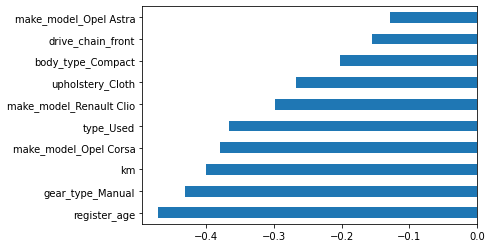

In [9]:
df.corr()["price"].sort_values().head(10).plot.barh()  # negativ correlation

<AxesSubplot:>

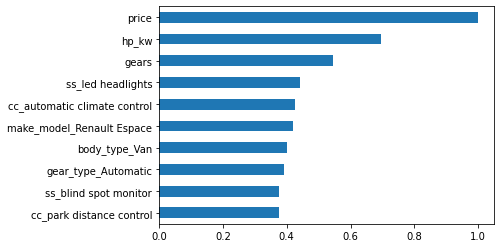

In [10]:
df.corr()["price"].sort_values().tail(10).plot.barh()  # negativ correlation

<AxesSubplot:xlabel='price'>

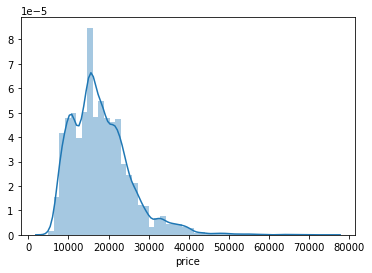

In [11]:
sns.distplot(df.price)  # distribution of price

<AxesSubplot:ylabel='price'>

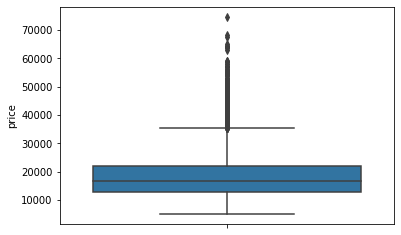

In [12]:
sns.boxplot(df.price, orient="v")

In [13]:
X = df.drop(["price"], axis=1)

In [14]:
y = df["price"]

In [15]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
X.shape

(15915, 159)

In [17]:
X_train.shape

(12732, 159)

In [18]:
X_test.shape

(3183, 159)

In [19]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  # empty model initiated
lm.fit(X_train,y_train)  # trained

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = lm.predict(X_test)  # predicted y values are calculated.

In [22]:
eval_metrics(y_test, y_pred)  # 89% of price can be explained by independent features (159 columns) 

r2_score: 0.8930250700447182 
 mae: 1665.1218135332647 
 mse: 5773178.144233625 
 rmse: 2402.7438782012587


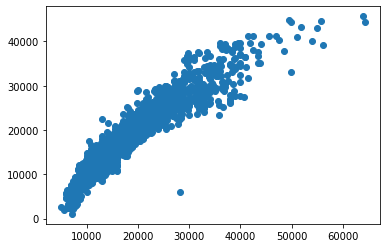

In [23]:
plt.scatter(y_test, y_pred)

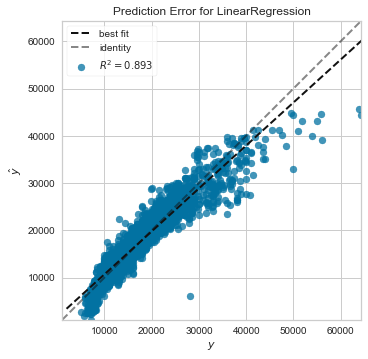

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [24]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

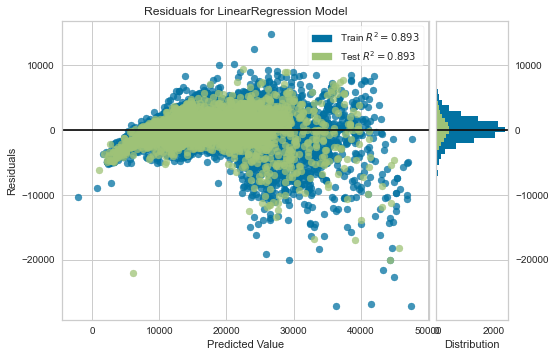

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [26]:
comparison = {"Actual": y_test, "Model prediction": y_pred, "Diff": y_pred-y_test, 
              "Diff %": 100*(y_pred-y_test)/y_test}
comparison_df = pd.DataFrame(comparison).round(1)

In [27]:
comparison_df.sort_values('Diff', ascending=True).head(20)  # summarize

Actual  Model prediction     Diff  Diff %
2614    28200            6082.2 -22117.8   -78.4
15824   64332           44301.6 -20030.4   -31.1
3595    63900           45693.7 -18206.3   -28.5
3597    56100           39167.3 -16932.7   -30.2
12747   49884           33038.2 -16845.8   -33.8
15815   53935           40003.2 -13931.8   -25.8
12758   40745           27370.2 -13374.8   -32.8
732     35900           23390.2 -12509.8   -34.8
3589    39959           27665.1 -12293.9   -30.8
12774   37950           26018.5 -11931.5   -31.4
3599    55000           43069.7 -11930.3   -21.7
7626    37995           26357.2 -11637.8   -30.6
7628    37995           26452.1 -11542.9   -30.4
15806   55800           44515.3 -11284.7   -20.2
12446   38900           27655.6 -11244.4   -28.9
12511   36500           25272.8 -11227.2   -30.8
3617    38000           26940.8 -11059.2   -29.1
15874   48490           37884.9 -10605.1   -21.9
3615    35899           25709.5 -10189.5   -28.4
12769   37985           27833.0 -10152.0   -26.7

In [28]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
cv_scores.mean()  # cross validation score

0.8882182520400844

In [29]:
cv_scores

array([0.86342943, 0.90032908, 0.88638104, 0.90125577, 0.86875872,
       0.89108253, 0.89634931, 0.88733661, 0.89626121, 0.89099883])

### 2.Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [31]:
ridge_model = Ridge(normalize=True)  # normalize oder scale must be applied.

In [32]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [33]:
y_pred = ridge_model.predict(X_test)

In [34]:
eval_metrics(y_test, y_pred)  # alpha is bad

r2_score: 0.8348407990434414 
 mae: 2060.0979272106206 
 mse: 8913242.47354102 
 rmse: 2985.505396669217


In [35]:
alpha_space = np.linspace(0.1,20,50)
ridgecv = RidgeCV(alphas=alpha_space, cv=10, normalize = True)
ridgecv.fit(X_train, y_train)
print('Best alpha:', ridgecv.alpha_)

Best alpha: 0.1


In [36]:
# alpha_space = np.linspace(0.1, 20, 50)

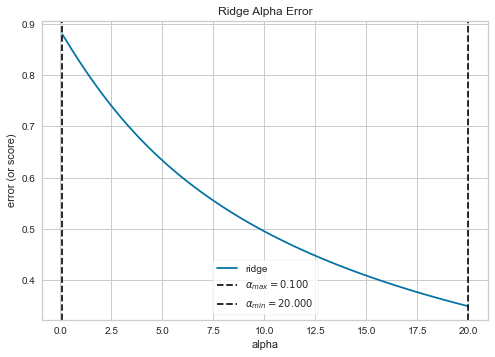

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [37]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [38]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8870229099873624 
 mae: 1728.6763391508696 
 mse: 6097100.200324745 
 rmse: 2469.230689977092


### 3. Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [40]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8844678427150433 
 mae: 1756.072175217222 
 mse: 6234990.999035862 
 rmse: 2496.9963954791488


In [41]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 10).fit(X_train, y_train)

In [42]:
lasso_cv_model.alpha_

0.1

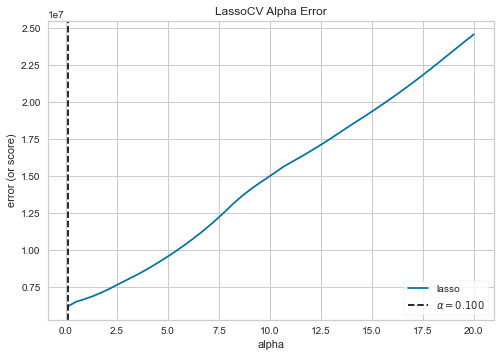

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [43]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = alpha_space
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [44]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8928228447078138 
 mae: 1683.5508746407145 
 mse: 5784091.756382891 
 rmse: 2405.0138786258367


In [45]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
feature_coef

features         coef
0                      Unnamed: 0     0.506857
1                              km    -0.038257
2                      prev_owner    -2.004431
3                           hp_kw    89.249588
4                 displacement_cc    -0.000000
..                            ...          ...
154              upholstery_Cloth    86.948239
155  upholstery_Part/Full Leather    -0.000000
156               drive_chain_4WD  2284.777118
157             drive_chain_front    -0.000000
158              drive_chain_rear -1474.599054

[159 rows x 2 columns]

In [46]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

122

In [47]:
# with alpha 4, coef is going down.
lasso_model = Lasso(4, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.843643847713453 
 mae: 2059.055698737579 
 mse: 8438163.23576465 
 rmse: 2904.851671904204


In [48]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
feature_coef

features        coef
0                      Unnamed: 0   -0.000000
1                              km   -0.029640
2                      prev_owner   -0.000000
3                           hp_kw  102.193552
4                 displacement_cc    0.000000
..                            ...         ...
154              upholstery_Cloth   -0.000000
155  upholstery_Part/Full Leather    0.000000
156               drive_chain_4WD    0.000000
157             drive_chain_front   -0.000000
158              drive_chain_rear   -0.000000

[159 rows x 2 columns]

In [49]:
significant_features.sort_values(by="coef", ascending=False)

features         coef
106         make_model_Audi A1  6952.125151
108         make_model_Audi A3  6624.956024
125         type_Demonstration  2406.844047
21         cc_heads-up display  2406.225149
156            drive_chain_4WD  2284.777118
..                         ...          ...
131           gear_type_Manual -1694.513238
110      make_model_Opel Corsa -2235.539037
112    make_model_Renault Clio -4859.980155
146          body_color_Orange -6374.971735
113  make_model_Renault Duster -9844.774778

[122 rows x 2 columns]

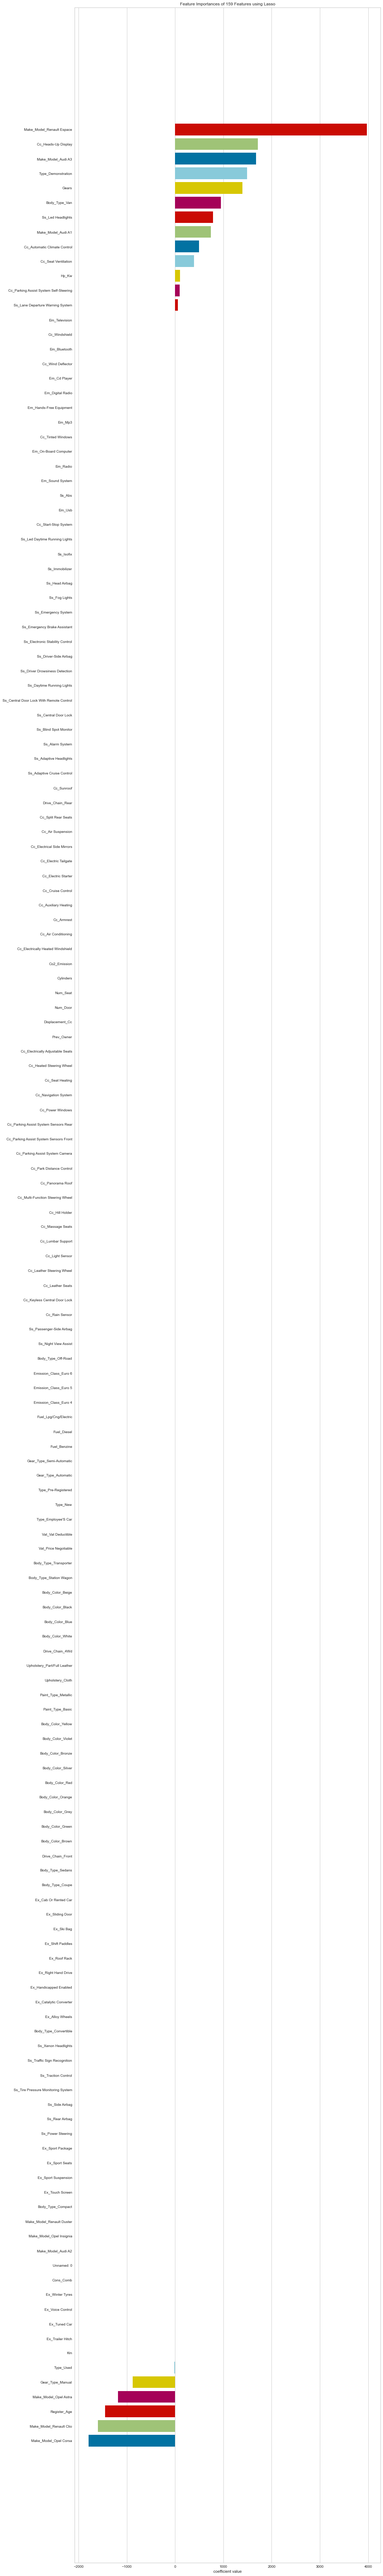

<AxesSubplot:title={'center':'Feature Importances of 159 Features using Lasso'}, xlabel='coefficient value'>

In [50]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

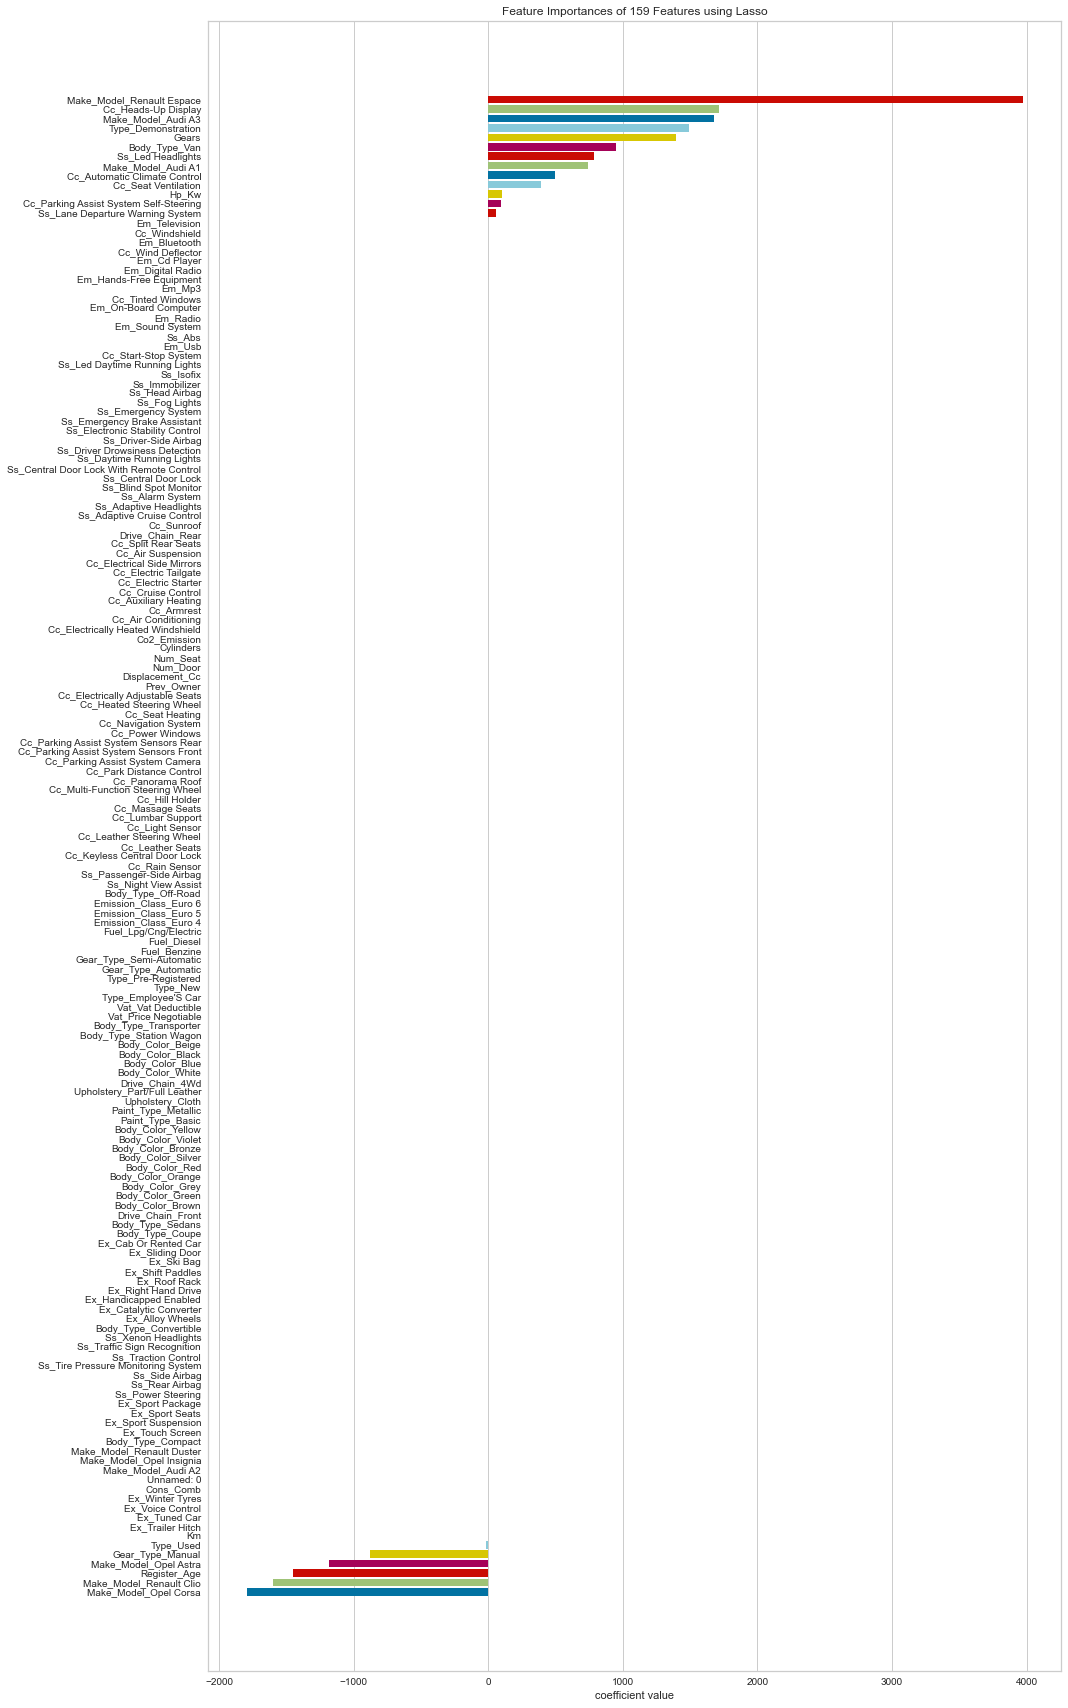

<AxesSubplot:title={'center':'Feature Importances of 159 Features using Lasso'}, xlabel='coefficient value'>

In [51]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 1720))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**saving scikit learn model**

In [52]:
df2=pd.read_pickle("scout_not_dummy.pkl")

In [53]:
df2.head()

displacement  make model     hp     km  ss_abs  ss_adaptive_cruise_control  \
0        1422.0  Audi    A1   66.0  56013     1.0                         0.0   
1        1798.0  Audi    A1  141.0  80000     1.0                         0.0   
2        1598.0  Audi    A1   85.0  83450     1.0                         0.0   
3        1422.0  Audi    A1   66.0  73000     1.0                         0.0   
4        1422.0  Audi    A1   66.0  16200     1.0                         0.0   

   ss_adaptive_headlights  ss_alarm_system  ss_blind_spot_monitor  ...  \
0                     0.0              0.0                    0.0  ...   
1                     0.0              0.0                    0.0  ...   
2                     0.0              0.0                    0.0  ...   
3                     0.0              1.0                    0.0  ...   
4                     0.0              0.0                    0.0  ...   

   cc_split_rear_seats  cc_start_stop_system  cc_sunroof  cc_tinted_windows  \
0                  0.0                   1.0         0.0                0.0   
1                  0.0                   1.0         0.0                1.0   
2                  0.0                   1.0         0.0                0.0   
3                  1.0                   1.0         0.0                0.0   
4                  0.0                   1.0         0.0                0.0   

   cc_wind_deflector  cc_windshield  ext_alloy_wheels  ext_touch_screen  \
0                0.0            0.0               1.0               0.0   
1                0.0            0.0               1.0               0.0   
2                0.0            0.0               1.0               0.0   
3                0.0            0.0               1.0               0.0   
4                0.0            0.0               1.0               0.0   

   ext_trailer_hitch  ext_voice_control  
0                0.0                1.0  
1                0.0                1.0  
2                0.0                1.0  
3                0.0                1.0  
4                0.0                1.0  

[5 rows x 98 columns]

In [54]:
new_list = ["hp", "age", "km", "model"]  # feature selection

In [55]:
X = df2[new_list]

In [56]:
X.head()

hp  age     km model
0   66.0    3  56013    A1
1  141.0    2  80000    A1
2   85.0    3  83450    A1
3   66.0    3  73000    A1
4   66.0    3  16200    A1

In [57]:
y = df2["price"]

In [58]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [59]:
X = pd.get_dummies(X)

In [60]:
X.head()

hp  age     km  model_A1  model_A2  model_A3  model_Astra  model_Clio  \
0   66.0    3  56013         1         0         0            0           0   
1  141.0    2  80000         1         0         0            0           0   
2   85.0    3  83450         1         0         0            0           0   
3   66.0    3  73000         1         0         0            0           0   
4   66.0    3  16200         1         0         0            0           0   

   model_Corsa  model_Espace  model_Insignia  
0            0             0               0  
1            0             0               0  
2            0             0               0  
3            0             0               0  
4            0             0               0

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8225558949799248 
 mae: 2107.666498972439 
 mse: 9265854.348411836 
 rmse: 3043.9865880801503


In [62]:
import pickle
pickle.dump(lm, open("saved_model", 'wb'))  # we are saving our model

In [63]:
# we are recalling our trained model:

richard_model = pickle.load(open("saved_model", "rb"))

In [64]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3'
}

In [65]:
df = pd.DataFrame.from_dict([my_dict])

In [66]:
df.head()

hp  age      km model
0  200    1  100000    A3

In [67]:
# my model expect 1, 0

columns = X.columns
columns

Index(['hp', 'age', 'km', 'model_A1', 'model_A2', 'model_A3', 'model_Astra',
       'model_Clio', 'model_Corsa', 'model_Espace', 'model_Insignia'],
      dtype='object')

In [68]:
df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)  # It makes model get_dummies, the others 0.

In [69]:
df.head()

hp  age      km  model_A1  model_A2  model_A3  model_Astra  model_Clio  \
0  200    1  100000         0         0         1            0           0   

   model_Corsa  model_Espace  model_Insignia  
0            0             0               0

In [70]:
pred = list(richard_model.predict(df))

In [71]:
pred  # car price is 34805 euro

[34805.69983017852]